# Matblotlib  <=>  seaborn 

In [20]:
import matplotlib.pyplot as plt 

lets plot some data 

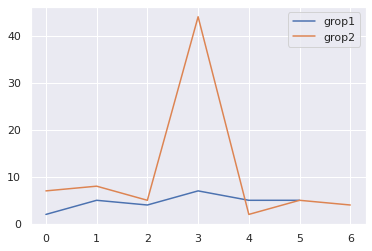

In [30]:
def plot_some_data():
    plt.Figure()
    x1=[2,5,4,7,5,5]
    x2=[7,8,5,44,2,5,4]
    plt.plot(x1,label='grop1')
    plt.plot(x2,label='grop2')
    plt.legend()
    plt.show
plot_some_data() 

In [22]:
import seaborn as sns

In [23]:
sns.set()

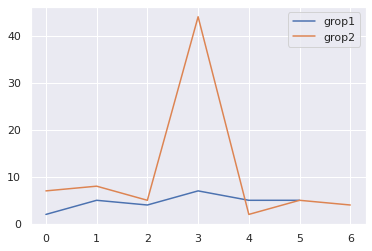

In [26]:
plot_some_data() 

In [31]:
sns.load_dataset?

Signature: sns.load_dataset(name, cache=True, data_home=None, **kws)
Docstring:
Load an example dataset from the online repository (requires internet).

This function provides quick access to a small number of example datasets
that are useful for documenting seaborn or generating reproducible examples
for bug reports. It is not necessary for normal usage.

Note that some of the datasets have a small amount of preprocessing applied
to define a proper ordering for categorical variables.

Use :func:`get_dataset_names` to see a list of available datasets.

Parameters
----------
name : str
    Name of the dataset (``{name}.csv`` on
    https://github.com/mwaskom/seaborn-data).
cache : boolean, optional
    If True, try to load from the local cache first, and save to the cache
    if a download is required.
data_home : string, optional
    The directory in which to cache data; see :func:`get_data_home`.
kws : keys and values, optional
    Additional keyword arguments are passed to passed thr

In [33]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [78]:
tips_df= sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [48]:
# f_tips= df['sex']=="Female"

# Female_tips=df[f_tips]
# Female_tips.head()

# result= df.loc[df['sex']=='Female']
# result.head()
Females_tips=tips_df[tips_df.sex=='Female']
Females_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3


In [53]:
meals_tips=Females_tips.groupby('time',as_index=False).tip.mean()
meals_tips.head()

,time,tip
0,Lunch,2.582857
1,Dinner,3.002115


<AxesSubplot:xlabel='time', ylabel='tip'>

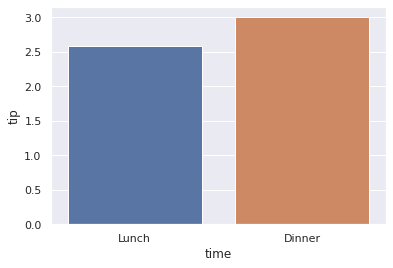

In [54]:
sns.barplot(x='time',y='tip',data=meals_tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

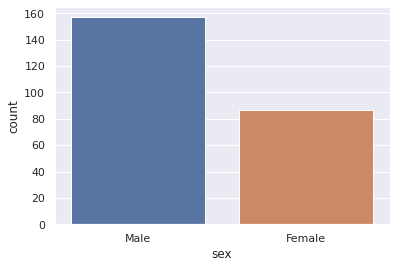

In [56]:
sns.countplot(data=tips_df,x='sex')

In [61]:
g_day=tips_df.groupby('day',as_index=False).tip.mean()
g_day.head()

,day,tip
0,Thur,2.771452
1,Fri,2.734737
2,Sat,2.993103
3,Sun,3.255132


In [62]:
help(sns.relplot)

Help on function relplot in module seaborn.relational:

relplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, units=None, **kwargs)
    Figure-level interface for drawing relational plots onto a FacetGrid.
    
    This function provides access to several different axes-level functions
    that show the relationship between two variables with semantic mappings
    of subsets. The ``kind`` parameter selects the underlying axes-level
    function to use:
    
    - :func:`scatterplot` (with ``kind="scatter"``; the default)
    - :func:`lineplot` (with ``kind="line"``)
    
    Extra keyword arguments are passed to the underlying function, so you
    should refer to the documentation for each to see kind-spe

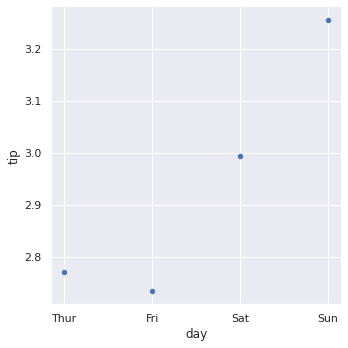

In [64]:
sns.relplot(x='day',y='tip',data=g_day)

In [65]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [66]:
flights= sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


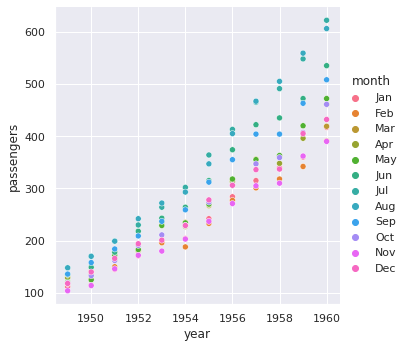

In [68]:
sns.relplot(x='year',y='passengers',hue='month',data=flights)

In [70]:
years_sum=flights.groupby('year',as_index=False).passengers.sum()
years_sum.head()

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700


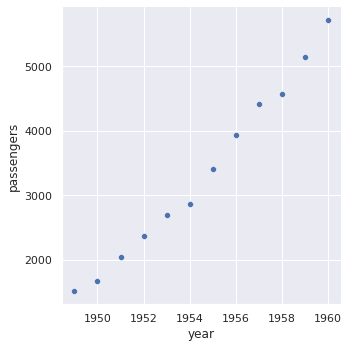

In [71]:
sns.relplot(x='year',y='passengers',data=years_sum)

<AxesSubplot:xlabel='year', ylabel='count'>

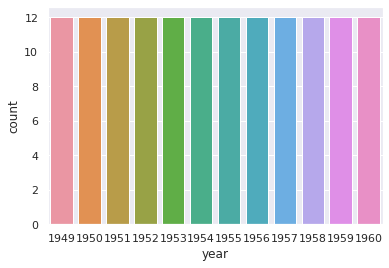

In [79]:
sns.countplot(data=flights,x='year')
# sns.countplot?


## predictions

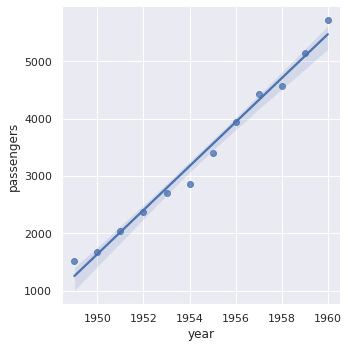

In [80]:
sns.lmplot(x='year',y='passengers',data=years_sum)

[Text(0, 0, '49'),
 Text(1, 0, '50'),
 Text(2, 0, '51'),
 Text(3, 0, '52'),
 Text(4, 0, '53'),
 Text(5, 0, '54'),
 Text(6, 0, '55'),
 Text(7, 0, '56'),
 Text(8, 0, '57'),
 Text(9, 0, '58'),
 Text(10, 0, '59'),
 Text(11, 0, '60')]

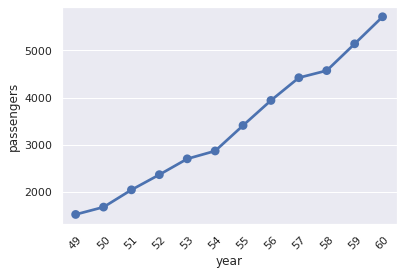

In [94]:
graph=sns.pointplot(x='year',y='passengers',data=years_sum)
graph.set_xticklabels(labels=[49,50,51,52,53,54,55,56,57,58,59,60],rotation=45)

[Text(0, 0, '49'),
 Text(1, 0, '50'),
 Text(2, 0, '51'),
 Text(3, 0, '52'),
 Text(4, 0, '53'),
 Text(5, 0, '54'),
 Text(6, 0, '55'),
 Text(7, 0, '56'),
 Text(8, 0, '57'),
 Text(9, 0, '58'),
 Text(10, 0, '59'),
 Text(11, 0, '60')]

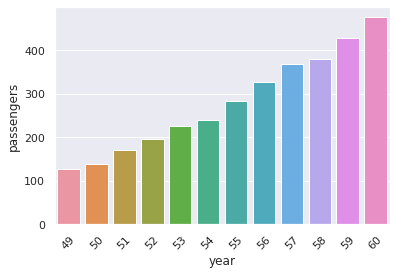

In [99]:
graph2=sns.barplot(x='year',y='passengers',data=flights,ci=None)
graph2.set_xticklabels(labels=[49,50,51,52,53,54,55,56,57,58,59,60],rotation=45)


<AxesSubplot:xlabel='month', ylabel='passengers'>

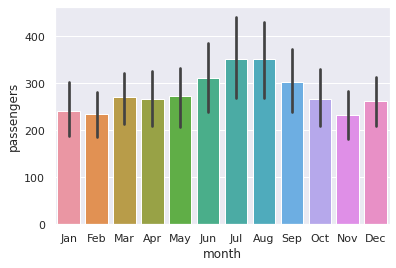

In [100]:
sns.barplot(x='month',y='passengers',data=flights)